In [1]:
%load_ext autoreload
%autoreload 1
import thumbnails

In [2]:
import numpy as np
import pyvista
import PIL.Image

In [2]:
# just going to get the vtkPolyData and render it using pyvista
from thumbnails.vtk_mesh_renderer import vtkMeshRenderer
datapath = '/Users/cam/data/dSpaceX/latest/nanoparticles_mesh/unprocessed_data/shape_representations/'
meshname = '1.ply'
ren = vtkMeshRenderer(datapath, meshname)

In [4]:
# get the polydata from the vtk renderer
vtkply = ren.polydata

In [1]:
from thumbnails.pyvista_mesh_renderer import pvMeshRenderer
datapath = '/Users/cam/data/dSpaceX/latest/nanoparticles_mesh/unprocessed_data/shape_representations/'
meshname = '1.ply'
ren = pvMeshRenderer(datapath, meshname)

NameError: name 'cpos' is not defined

## work interactively to determine best camera position and color
process is: 
- render, stop, examine, repeat

When we're happy with the settings, use the screenshot version below

In [5]:
plotter = pyvista.Plotter(notebook=False)

### create a function to update mesh and viewpoint and other settings

In [31]:
def newPlotter(meshname, offscreen = False):
    plotter = pyvista.Plotter(notebook=False, off_screen=offscreen, shape="1/3", border=True)
    newMesh(plotter, meshname)
    return plotter

In [7]:
def newMesh(plotter, meshname):
    ren.loadNewMesh(datapath + meshname)
    vtkply = ren.polydata
    plotter.subplot(0)
    plotter.add_mesh(vtkply, color=[0,0,0], name="sample")
    plotter.subplot(1)
    plotter.add_mesh(vtkply, color=[0,0,0], name="sample")
    plotter.subplot(2)
    plotter.add_mesh(vtkply, color=[0,0,0], name="sample")
    plotter.subplot(3)
    plotter.add_mesh(vtkply, color=[1.0, 0.766, 0.336], specular=0.5, specular_power=15, name="sample")


### Settings

In [8]:
def updateSettings(plotter, cpos = None):
    plotter.set_background([1,1,1])

    # xy view
    plotter.subplot(0)
    plotter.view_xz(negative=True)

    # xz view
    plotter.subplot(1)
    plotter.view_xy(negative=True)

    # yz view
    plotter.subplot(2)
    plotter.view_yz(negative=True)

    # main view
    plotter.subplot(3)
    plotter.isometric_view()
    if not cpos:
        lf = np.asarray(plotter.camera_position[0])
        la = np.asarray(plotter.camera_position[1])
        vup = np.asarray(plotter.camera_position[2])
        pos = (lf - la) / 1.3
        plotter.camera_position = (pos, la, vup)
    else:
        plotter.camera_position = cpos


### reset and render

In [9]:
plotter = newPlotter(meshname)
updateSettings(plotter)
plotter.camera_position

[(9.776843505102068, 9.776843505102068, 9.776843505102068),
 (1.0134658813476562, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [10]:
prevpos = plotter.show(window_size=[1024,1024])  # [300,300] more likely default

In [11]:
cpos = prevpos
plotter = newPlotter("29.ply")
updateSettings(plotter, cpos)
prevpos = plotter.show(window_size=[1024,1024])

In [12]:
cpos = None
plotter = newPlotter("175.ply")
updateSettings(plotter, cpos)
prevpos = plotter.show(window_size=[1024,1024])

In [13]:
cpos = None
plotter = newPlotter("1175.ply")
updateSettings(plotter, cpos)
prevpos = plotter.show(window_size=[1024,1024])

In [14]:
cpos = None
plotter = newPlotter("975.ply")
updateSettings(plotter, cpos)
prevpos = plotter.show(window_size=[1024,1024])

In [28]:
cpos = None
plotter = newPlotter("1375.ply")
updateSettings(plotter, cpos)
prevpos = plotter.show(window_size=[1024,1024])

### examine results

In [16]:
# lf, la, vup
plotter.camera_position

[(10.912054742041859, 10.912054742041859, 10.912054742041859),
 (1.467563509941101, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [57]:
cam = plotter.renderer.camera
cam.GetViewAngle()

30.0

In [55]:
vtkply.GetBounds()

(-1.4180299043655396,
 2.7301385402679443,
 -2.3780059814453125,
 2.3780059814453125,
 -0.7126983404159546,
 0.7126983404159546)

In [56]:
pts = vtkply.GetPoints()
pts.GetBounds()

(-1.4180299043655396,
 2.7301385402679443,
 -2.3780059814453125,
 2.3780059814453125,
 -0.7126983404159546,
 0.7126983404159546)

### stuff I've learned

In [52]:
# can't set a non-existent subplot
newplotter = pyvista.Plotter(notebook=False, off_screen=True, shape=(1,1), border=True)
newplotter.subplot(4,0)

IndexError: Row index is out of range (1)

In [53]:
# can't toggle show after plotter is initialized off_screen
newplotter = pyvista.Plotter(notebook=False, off_screen=True, shape=(1,1), border=True)
newplotter.off_screen = False
newplotter.show()

AttributeError: 'Plotter' object has no attribute 'iren'

## Screenshot version

In [23]:
osplotter = newPlotter("175.ply", offscreen=True)
updateSettings(osplotter, cpos)
prevpos = osplotter.camera_position
screenshot = osplotter.screenshot(return_img=True, window_size=[1024,1024])

In [30]:
osplotter = newPlotter("1275.ply", offscreen=True)
updateSettings(osplotter, prevpos)
prevpos = osplotter.camera_position
screenshot = osplotter.screenshot(return_img=True, window_size=[1024,1024])

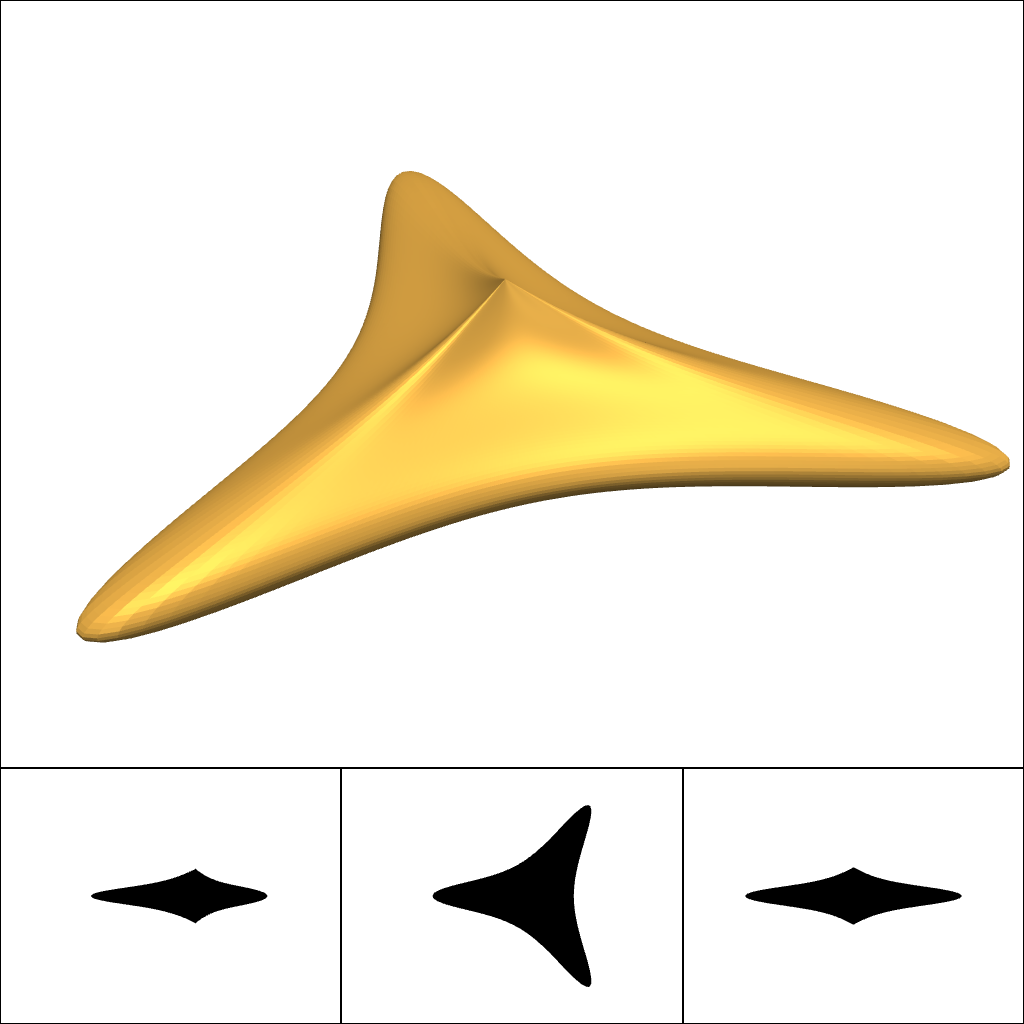

In [25]:
PIL.Image.fromarray(screenshot)

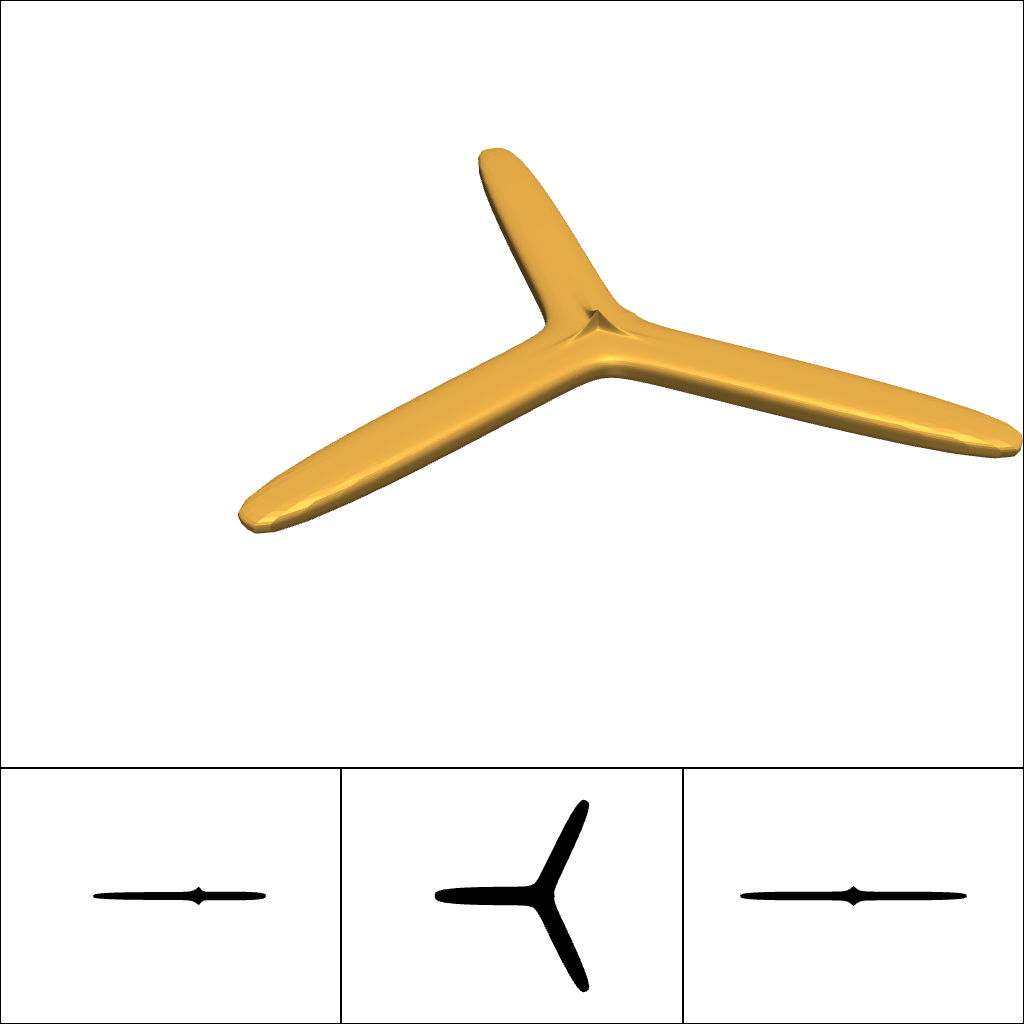

In [26]:
# render another screenshot
osplotter = newPlotter("1375.ply", offscreen=True)
updateSettings(osplotter)
ss = osplotter.screenshot(return_img=True, window_size=[1024,1024])
PIL.Image.fromarray(ss)